### Initialization of Variables

In [46]:
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]
del all

### Module Import

In [47]:
import numpy as np
import os, sys
import importlib
import matplotlib.pyplot as plt
sys.path.append("../Assignment_2")
import module_opt
importlib.reload(module_opt)
from module_opt import *

### Test Functions for Constrained Optimization

1. Rosenbrock function constrained within a disk  
min &nbsp; $ f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 $  
s.t. &nbsp; $ c(x_1, x_2) = 2 -x_1^2 - x_2^2 ≥ 0 $

2. Rosenbrock function on a disk  
min &nbsp; $ f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 $  
s.t. &nbsp; $ c(x_1, x_2) = 1 - x_1^2 - x_2^2 = 0 $

3. Rosenbrock function on straight line  
min &nbsp; $ f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 $  
s.t. &nbsp; $ c(x_1, x_2) = 1 - x_1 - x_2 = 0 $

4. Mishra's Bird function  
min &nbsp; $ f(x_1, x_2) = sin(x_2)e^{(1-cosx_1)^2} + cos(x_1)e^{(1-sinx_2)^2} + (x_1 - x_2)^2 $  
s.t. &nbsp; $ c(x_1, x_2) = - (x_1 + 5)^2 - (x_2 + 5)^2 + 25 ≥ 0 $

5. Townsend function  
min &nbsp; $ f(x1, x_2) = -[cos{(x_1 - 0.1)x_2}]^2 - x_1sin(3x_1 + x_2) $  
s.t. &nbsp; $ c(x1, x_2) = -x_1^2 - x_2^2 + [2cos\{atan2(x_1, x_2)\} - \frac{1}{2}cos\{2atan2(x_1, x_2)\} - \frac{1}{4}cos\{3atan2(x_1, x_2)\} - \frac{1}{8}cos\{4atan2(x_1, x_2)\}]^2 + [2sin\{atan2(x_1, x_2)\}]^2 ≥ 0 $





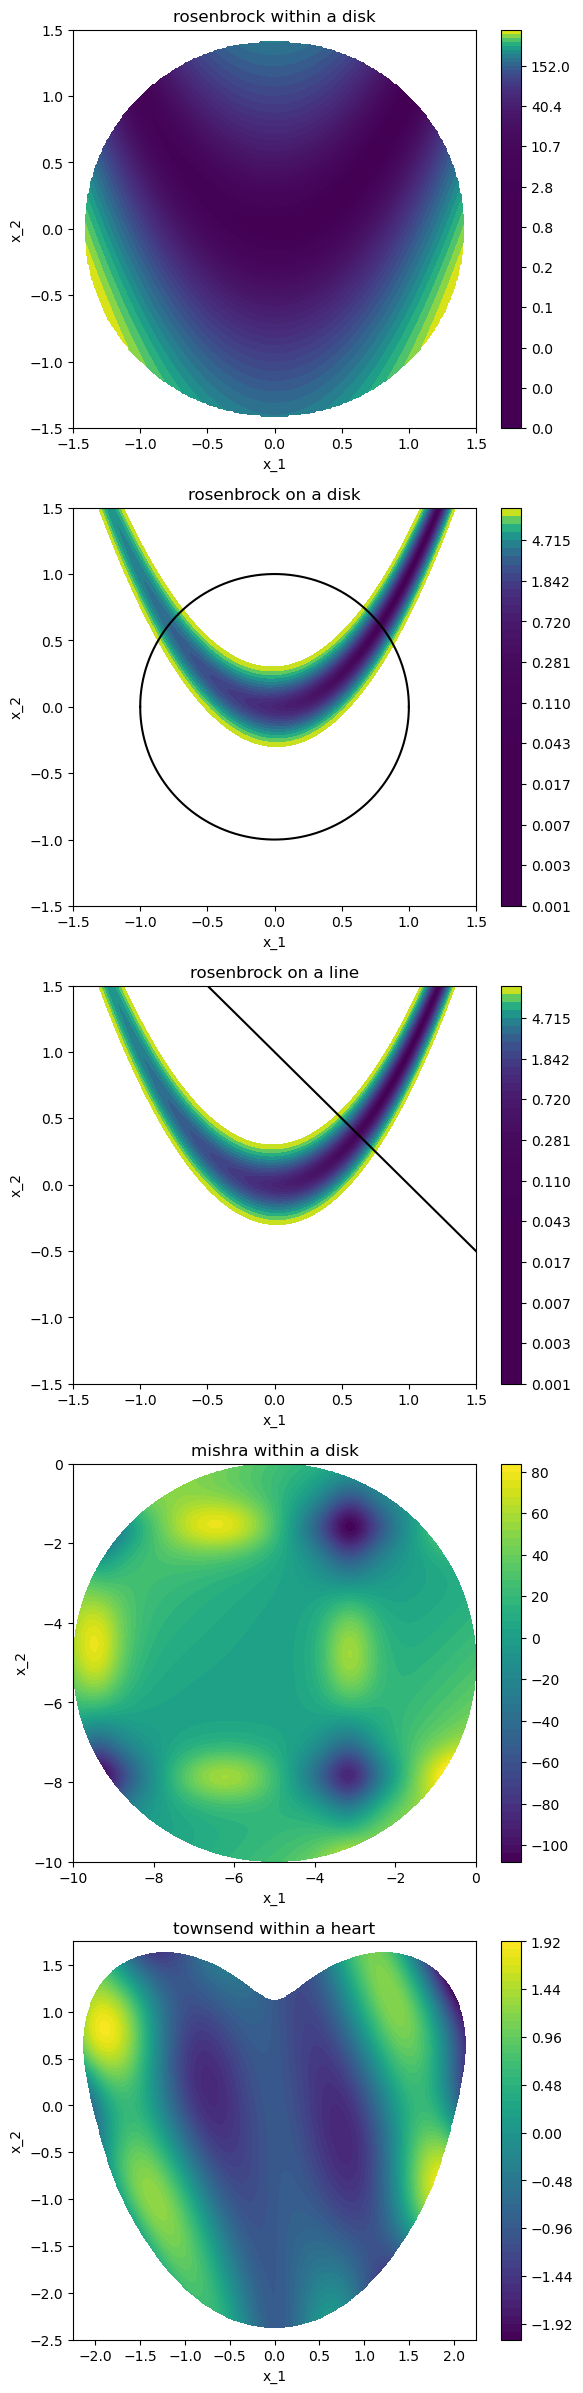

In [48]:
### define functions
f_rosenbrock = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock = lambda x : 2 - x[0]**2 - x[1]**2

f_rosenbrock_eqdisk = lambda x : f_rosenbrock(x)
c_rosenbrock_eqdisk = lambda x : 1 - x[0]**2 - x[1]**2

f_rosenbrock_eqline = lambda x : f_rosenbrock(x)
c_rosenbrock_eqline = lambda x : 1 - x[0] - x[1]

f_mishra = lambda x : np.sin(x[1])*np.exp((1-np.cos(x[0]))**2) + np.cos(x[0])*np.exp((1-np.sin(x[1]))**2) + (x[0] - x[1])**2
c_mishra = lambda x : -(x[0] + 5)**2 - (x[1] + 5)**2 + 25

f_townsend = lambda x : -(np.cos((x[0] - .1)*x[1]))**2 - x[0]*np.sin(3*x[0] + x[1])
c_townsend = lambda x : -x[0]**2 - x[1]**2 + (2*np.cos(np.atan2(x[0], x[1])) - .5*np.cos(2*np.atan2(x[0], x[1])) -.25*np.cos(3*np.atan2(x[0], x[1])) - .125*np.cos(4*np.atan2(x[0], x[1])))**2 + (2*np.sin(np.atan2(x[0], x[1])))**2

### evaluate functions
step_rosenbrock = .01
grid_rosenbrock = np.meshgrid(np.arange(-1.5, 1.5+step_rosenbrock, step_rosenbrock), np.arange(-1.5, 1.5+step_rosenbrock, step_rosenbrock))
fval_grid_rosenbrock = f_rosenbrock(grid_rosenbrock)
fval_grid_rosenbrock[c_rosenbrock(grid_rosenbrock) < 0] = None

step_rosenbrock_eq = .01
grid_rosenbrock_eq = np.meshgrid(np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq), np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq))
fval_grid_rosenbrock_eq = f_rosenbrock(grid_rosenbrock_eq)

step_mishra = .01
grid_mishra = np.meshgrid(np.arange(-10, 0+step_mishra, step_mishra), np.arange(-10, 0+step_mishra, step_mishra))
fval_grid_mishra = f_mishra(grid_mishra)
fval_grid_mishra[c_mishra(grid_mishra) < 0] = None

step_townsend = .01
grid_townsend = np.meshgrid(np.arange(-2.25, 2.25+step_townsend, step_townsend), np.arange(-2.5, 1.75+step_townsend, step_townsend))
fval_grid_townsend = f_townsend(grid_townsend)
fval_grid_townsend[c_townsend(grid_townsend) < 0] = None

### plot functions
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6.5, 6*5))
contour_0 = axes[0].contourf(grid_rosenbrock[0], grid_rosenbrock[1], fval_grid_rosenbrock, levels=np.logspace(-3, 2.7, 100))
axes[0].set_xlabel('x_1'); axes[0].set_ylabel('x_2'); axes[0].set_title('rosenbrock within a disk')
fig.colorbar(contour_0, ax=axes[0])

contour_1 = axes[1].contourf(grid_rosenbrock_eq[0], grid_rosenbrock_eq[1], fval_grid_rosenbrock_eq, levels=np.logspace(-3, 1))
x_disk_eq = np.arange(-1.0, 1+.0001, .0001); y_disk_eq_pos = (1 - x_disk_eq**2)**.5; y_disk_eq_neg = -(1 - x_disk_eq**2)**.5
axes[1].plot(x_disk_eq, y_disk_eq_pos, 'k') 
axes[1].plot(x_disk_eq, y_disk_eq_neg, 'k')
axes[1].set_xlabel('x_1'); axes[1].set_ylabel('x_2'); axes[1].set_title('rosenbrock on a disk')
fig.colorbar(contour_1, ax=axes[1])

contour_2 = axes[2].contourf(grid_rosenbrock_eq[0], grid_rosenbrock_eq[1], fval_grid_rosenbrock_eq, levels=np.logspace(-3, 1))
x_line_eq = np.arange(-0.5, 1.5+.01, .01); y_line_eq = 1 - x_line_eq
axes[2].plot(x_line_eq, y_line_eq, 'k')
axes[2].set_xlabel('x_1'); axes[2].set_ylabel('x_2'); axes[2].set_title('rosenbrock on a line')
fig.colorbar(contour_2, ax=axes[2])

contour_3 = axes[3].contourf(grid_mishra[0], grid_mishra[1], fval_grid_mishra, levels=50)
axes[3].set_xlabel('x_1'); axes[3].set_ylabel('x_2'); axes[3].set_title('mishra within a disk')
fig.colorbar(contour_3, ax=axes[3])

contour_4 = axes[4].contourf(grid_townsend[0], grid_townsend[1], fval_grid_townsend, levels=50)
axes[4].set_xlabel('x_1'); axes[4].set_ylabel('x_2'); axes[4].set_title('townsend within a heart')
fig.colorbar(contour_4, ax=axes[4])


### Quadratic Penalty Method(QPM) 함수 초안

In [49]:
# # f = f_rosenbrock # objective function
# # ce = [] # equality constraints
# # ci = [c_rosenbrock] # inequality constraints
# # x0 = np.array([-1, -1])

# # f = f_rosenbrock_eqdisk # objective function
# # ce = [c_rosenbrock_eqdisk] # equality constraints
# # ci = [] # inequality constraints
# # x0 = np.array([-.5, -.5])

# # f = f_rosenbrock_eqline # objective function
# # ce = [c_rosenbrock_eqline] # equality constraints
# # ci = [] # inequality constraints
# # x0 = np.array([-.5, -.5])

# # f = f_mishra # objective function
# # ce = [] # equality constraints
# # ci = [c_mishra] # inequality constraints
# # x0 = np.array([-3, -3])

# f = f_townsend # objective function
# ce = [] # equality constraints
# ci = [c_townsend] # inequality constraints
# x0 = np.array([1.4, 1])

# ##########################################################################################################################
# inner_opt = quasi_newton_bfgs
# tol = 1e-4

# if (len(ci) + len(ce)) == 0:
#     raise ValueError('Please input at least either one equality constraint or one inequality constraint !')

# if (not isinstance(x0, np.ndarray)) | (x0.ndim >= 2):
#     raise ValueError('Please input 1D ndarray type !!')

# if (inner_opt == newton):
#     raise ValueError('Please choose 1st derivative based optimization method when using QPM !')

# f0 = f(x0)
# if not np.isfinite(f0).all():
#     raise ValueError('Function value at x0 is not finite. Try another x0 !')

# ### Check inequality feasibility of x0
# if len(ci) >= 1: # 부등호제약조건은 feasibility 고려하고 등호제약조건은 미고려(∵ exactly하게 맞추기가 더 어려움)
#     infeasible_ci = [ci_i(x0) for ci_i in ci if ci_i(x0) < 0] # infeasible criteria of c
#     if len(infeasible_ci) >= 1:
#         raise ValueError(f'Infeasible x0 for {len(infeasible_ci)} inequality constraint(s). Try feasible x0 !')

# ### Check gradient of x0
# grad0 = grad_centraldiff(f, x0)
# if np.linalg.norm(grad0) < tol: # Check optimality
#     print(f'Since |grad(x0)| = {np.linalg.norm(grad0)} < {tol}, x0 : {x0} is optimum point !')
#     # return x0
# else:
#     print(f'Since |grad(x0)| = {np.linalg.norm(grad0)} > {tol}, x0 : {x0} is not an optimum point. Optimization begins !')
#     pass

# ### Initialization for searching iterations
# # Qk 만들 때 필요한 quadratic penalty term of equality constraints 미리 정의
# if len(ce) == 0:
#     sum_ce_sq = lambda x : 0 # If no equality constraints -> No term of ce for Qk
# else:
#     sum_ce_sq = lambda x : np.sum([(ce_i(x))**2 for ce_i in ce]) # Equality constraints exist -> sum(c_e(x)^2) for Qk

# # Qk 만들 때 필요한 quadratic penalty term of inequality constraints 미리 정의
# if len(ci) == 0:
#     sum_ci_sq = lambda x : 0 # If no inequality constraints -> No term of ci for Qk
# else:
#     sum_ci_sq = lambda x : np.sum([(np.max([-ci_i(x), 0]))**2 for ci_i in ci]) # sum(c_i(x)^2) for Qk

# x_new = x0
# f_mu = 5; mu_new = 1 # increase factor for penalty parameter mu ; mu0 = 1
# f_tau = .5; tau_new = .2 # decrease factor for convergence criteria for Qk ; tau0 = .2

# ### Outer loop begins
# for j in np.arange(100): # mu가 너무 커지면 Qk가 unstable해지기 때문에 어차피 finite한 iterations 내에서 쇼부를 봐야 한다.
#     # Finding a x*_k in Qk
#     x_cur = x_new # x_k
#     mu_cur = mu_new; print(f'mu_{j} = {mu_cur}') # penalty parameter update(increase)
#     tau_cur = tau_new; print(f'tau_{j} = {tau_cur}') # Qk convergence criteria update(decrease)
#     Q_cur = lambda x : f(x) + .5*mu_cur*sum_ce_sq(x) + .5*mu_cur*sum_ci_sq(x) # quadratic penalty function Qk at x_k
#     list_x, list_f, list_grad = inner_opt(Q_cur, x_cur, tau_cur) # Solving ∇Qk(x*_k) ≤ tau_k ; Inner loop
#     x_new = list_x[-1]
#     mu_new = mu_cur*f_mu
#     tau_new = tau_cur*f_tau

#     # Convergence check of x*
#     move_x = np.linalg.norm(x_new - x_cur) # convergence criteria of x*_k
#     violated_ce = [ce_i(x_new) for ce_i in ce if np.abs(ce_i(x_new)) > 1e-4] # violation criteria of ce(x*_k)
#     violated_ci = [ci_i(x_new) for ci_i in ci if ci_i(x_new) < -1e-4] # violation criteria of ci(x*_k)
#     if (move_x < 1e-4) & (len(violated_ci) == 0) & (len(violated_ce) == 0):
#         done = True # flag for termination of outerloop
#     else:
#         done = False

#     print(f'{j+1}-th outer loop : Inner loop converges at {len(list_x) - 1} iteration(s) ...')
#     print(f'|x_{j+1} - x_{j}| = {move_x}')
#     print(f'# of violated ce constraints : {len(violated_ce)}, violation : {np.sum(violated_ce)}')
#     print(f'# of violated ci constraints : {len(violated_ci)}, violation : {np.sum(violated_ci)}')
#     print(f'\n------------------------------------------------------------- Outer loop ----------------------------------------------------------------\n')

#     if done:
#         print(f'Outer loop converges at {j+1} iteration(s) !')
#         print(f'iter = {j+1} x* = {x_new}, f(x*) = {f(x_new)}, |ce(x*)|₁ = {np.sum(np.abs([ce_i(x_new) for ce_i in ce]))}, |ci(x*)|₁ = {np.sum(np.abs([ci_i(x_new) for ci_i in ci]))}')
#         break

### ALM 함수 초안

In [50]:
f = f_rosenbrock # objective function
ce = [] # equality constraints
ci = [c_rosenbrock] # inequality constraints
x0 = np.array([-1, -1])

# f = f_rosenbrock_eqdisk # objective function
# ce = [c_rosenbrock_eqdisk] # equality constraints
# ci = [] # inequality constraints
# x0 = np.array([-.5, -.5])

# f = f_rosenbrock_eqline # objective function
# ce = [c_rosenbrock_eqline] # equality constraints
# ci = [] # inequality constraints
# x0 = np.array([-.5, -.5])

# # bfgs가 f_mishra에 대해서는 해를 못 찾고 발산한다. 0번째(초기) outer loop에서 만들어진 LAk가 penalty term을 전혀 포함하지 않아서 inner loop 들어가서 찾아지는 x*_k가 완전히 constraint 영역 바깥으로 나가버린다.
# # 근데 문제는 그다음 outer loop에서  penalty term이 생성되서 penalization을 해야 하는데 이 때 bfgs에서 찾는 p가 너무 작아서 alpha랑 결합해도 너무 작아서 점이 거의 안 움직인다.
# # 결과적으로 inner loop에서 찾는 x*_k가 이전 loop에서 찾은 것과 거의 똑같아서 x_k도, constraint violation도 거의 그대로나 마찬가지가 된다.
# # 이러한 문제는 cg_fr을 bfgs 대신 사용 시 해결되어진다. 잘 찾는다. 왜인지는 모르겠다. 근데 얘도 똑같이 p랑 alpha가 매우 작게 구해지는데 어찌저찌 다행히 올바른 path로 수렴해간다.
# f = f_mishra # objective function 
# ce = [] # equality constraints
# ci = [c_mishra] # inequality constraints
# x0 = np.array([-3, -3])

# # cg_fr이 첫번째 outer loop에서부터 x*_k를 찾지못해 쩔쩔맨다. 계속 발산함. penalty 항이 없으니까 밑도 끝도 없이 발산한다.
# # 페널티 항을 초반부터 형성해줘도 feaisble 영역을 벗어나서 계속 발산한다.
# # 이 문제에 너무 억매이지 말자. 굉장한 비선형성을 가진 함수이고 local stationary points도 정말 너무 많이 가지고 있는 개형이다.
# f = f_townsend # objective function
# ce = [] # equality constraints
# ci = [c_townsend] # inequality constraints
# x0 = np.array([1.4, 1])

##########################################################################################################################
inner_opt = cg_fr # cg_fr
tol = 1e-4

### Check input data type
if (not isinstance(ce, list)) | (not isinstance(ci, list)) | (len(ci) + len(ce) == 0):
    raise ValueError('Please input at least either one equality or inequality constraint as list type ! ; Empty list is OK as well.')

if (not isinstance(x0, np.ndarray)) | (x0.ndim >= 2):
    raise ValueError('Please input x0 as 1D ndarray type !!')

### Check f(x0)
f0 = f(x0)
if not np.isfinite(f0).all():
    raise ValueError('Function value at x0 is not finite. Try another x0 !')

### Check ci(x0) ≥ 0
if len(ci) >= 1: # 부등호제약조건은 feasibility 고려하고 등호제약조건은 미고려(∵ exactly하게 맞추기가 더 어려움)
    infeasible_ci = [ci_j(x0) for ci_j in ci if ci_j(x0) < 0] # infeasible criteria of c
    if len(infeasible_ci) >= 1:
        raise ValueError(f'Infeasible x0 for {len(infeasible_ci)} of {len(ci)} inequality constraint(s). Try feasible x0 !')

### Check ∇f(x0)
grad0 = grad_centraldiff(f, x0)
if np.linalg.norm(grad0) < tol: # Check optimality
    print(f'Since |grad(x0)| = {np.linalg.norm(grad0)} < {tol}, x0 : {x0} is optimum point !')
    # return x0

### Initialization for searching iterations
x_new = x0

### Parameter setting for ALM
# Final tolerance for outer loop
tol_eq_final = 1e-6 # equality feasibility
tol_ineq_final = 1e-6 # inequality feasibility
tol_opt_final = 1e-6 # optimality (∥∇L_A∥∞)
tol_step_final = 1e-8 # step size (relative factor 포함 권장)

# Initial tolearnce of constraints for outer loop(점차 tighten)
tol_eq   = 1e-3
tol_ineq = 1e-3

# Tolerance update scheme for inner loop : tau_k = max(omega_min, omega0 * (omega_decay)^k)
omega0 = 1e-2
omega_decay = 0.5
omega_min = tol_opt_final
tau = omega0   # == tau_0

# Penalty parameter increase factor / upper bound
factor_mu  = 5.0
factor_rho = 5.0
mu_max   = 1e8
rho_max  = 1e8

lmbda = np.array([0]*len(ce)) # initial lagrange multipliers of equality constraints for Lk
nu = np.array([0]*len(ci)) # initial lagrange multipliers of inequality constraints
mu = 1 # increase factor for equality constraint penalty parameter mu ; mu0 = 1
rho = 1 # increase factor for inequality constraint penalty parameter rho ; rho0 = 1

### Outer loop begins
for k in np.arange(100): # mu가 너무 커지면 Qk가 unstable해지기 때문에 어차피 finite한 iterations 내에서 쇼부를 봐야 한다.
    x_cur = x_new # x_k
    print(f'mu_{k} = {mu}')
    print(f'rho_{k} = {rho}')
    print(f'tau_{k} = {tau}')

    # penalty term update depending on the cases
    if (len(ce) >= 1) & (len(ci) >= 1): # both ci, ce exist in opt
        penalty_ce = lambda x : -lmbda@np.array([ce_j(x) for ce_j in ce]) + .5*mu*np.sum(np.array([ce_j(x)**2 for ce_j in ce]))
        penalty_ci = lambda x : (-nu@np.array([ci_j(x) - np.max(ci_j(x) - nu[j]/rho, 0) for j, ci_j in enumerate(ci)]) +
                                 .5*rho*np.sum(np.array([(ci_j(x) - np.max(ci_j(x) - nu[j]/rho, 0))**2 for j, ci_j in enumerate(ci)])))
    elif len(ce) >= 1: # only ce exists in opt
        penalty_ce = lambda x : -lmbda@np.array([ce_j(x) for ce_j in ce]) + .5*mu*np.sum(np.array([ce_j(x)**2 for ce_j in ce]))
        penalty_ci = lambda x : 0
    else: # only ci exists in opt
        penalty_ce = lambda x : 0
        penalty_ci = lambda x : (-nu@np.array([ci_j(x) - np.max(ci_j(x) - nu[j]/rho, 0) for j, ci_j in enumerate(ci)]) +
                                 .5*rho*np.sum(np.array([(ci_j(x) - np.max(ci_j(x) - nu[j]/rho, 0))**2 for j, ci_j in enumerate(ci)])))

    LA_cur = lambda x : f(x) + penalty_ce(x) + penalty_ci(x) # augmented lagrangian function LAk at x_k
    log_inner = inner_opt(LA_cur, x_cur, tau) # solving ∇LAk(x*_k) ≤ tau_k ; Inner loop
    x_new = log_inner[0][-1]
    f_new = f(x_new)
    ce_new = np.array([ce_j(x_new) for ce_j in ce])
    ci_new = np.array([ci_j(x_new) for ci_j in ci])
    grad_LA_new = log_inner[-1][-1]

    # residual(잔차) 계산
    r_ce = np.max(np.abs(ce_new)) if len(ce_new) >= 1 else 0 # 등호제약조건 잔차(위반)
    r_ci = np.max(np.maximum(-ci_new, 0)) if len(ci_new) >= 1 else 0 # 부등호제약조건 잔차(위반)
    r_grad_LA = np.max(grad_LA_new) # ∇L_A 수준
    r_step = np.linalg.norm(x_new - x_cur) # x_new - x_cur 거리

    # Convergence check for Outer loop
    if ((r_ce <= tol_eq_final) & # 등호제약조건 위반이 충분히 작고
        (r_ci <= tol_ineq_final) & # 부등호제약조건 위반도 충분히 작고
        (r_grad_LA <= tol_opt_final) & # ∇L_A도 충분히 정칙점에 도달했고
        (r_step <= tol_step_final * (1.0 + np.linalg.norm(x_new)))): # x_new도 충분히 수렴했다면
        done = True # outer loop 종료 flag 마킹하자
    else:
        done = False

    # ---- penalty parameter update(keep or increase) ----
    # ce
    if r_ce <= tol_eq:
        mu = mu # 등호제약조건 위반이 충분히 작다면 페널티 파라미터를 그대로 두자
    else:
        mu = min(factor_mu*mu, mu_max) # 등호제약조건 위반이 크다면 페널티 파라미터를 증가시키자

    # ci
    if r_ci <= tol_ineq:
        rho = rho # 부등호제약조건 위반이 충분히 작다면 페널티 파라미터를 그대로 두자
    else:
        rho = min(factor_rho*rho, rho_max) # 부등호제약조건 위반이 크다면 페널티 파라미터를 증가시키자

    # ---- tolerance update ----
    # If 제약조건 잔차 ≈ 0 and ∇L_A ≈ 0 -> 제약조건 tolerance를 조금 더 빡세게 두자(감소시키자)
    if (r_ce <= 0.3*tol_eq) & (r_ci <= 0.3*tol_ineq) & (r_grad_LA <= 0.3*tau):
        tol_eq = max(tol_eq_final,   0.5*tol_eq)
        tol_ineq = max(tol_ineq_final, 0.5*tol_ineq)

    # 내부 허용치 스케줄(항상 단조 감소)
    tau = max(omega_min, omega_decay*tau)

    # ---------------------------------------- print log ----------------------------------------
    print(f'{k+1}-th outer loop : Inner loop converges at {len(log_inner[0]) - 1} iteration(s) ...')
    print(f'|x_{k+1} - x_{k}| = {r_step}')
    print(f'Max violation of equality constraints : {r_ce}')
    print(f'Max violation of inequality constraints : {r_ci}')
    print(f'\n------------------------------------------------------------- Outer loop ----------------------------------------------------------------\n')

    if done:
        print(f'Outer loop converges at {k+1} iteration(s) !')
        print(f'iter = {k+1} x* = {x_new}, f(x*) = {f(x_new)}, ∇L_A(x*) = {grad_LA_new}, max(ce(x*)) = {r_ce}, max(ci(x*)) = {r_ci}')
        break
print(f'Outer loop terminates at {k+1}(max) iteration(s) !')
print(f'iter = {k+1} x* = {x_new}, f(x*) = {f(x_new)}, ∇L_A(x*) = {grad_LA_new}, max(ce(x*)) = {r_ce}, max(ci(x*)) = {r_ci}')

mu_0 = 1
rho_0 = 1
tau_0 = 0.01
Since |grad(x0)| = 898.0066815483765 > 0.01, x0 : [-1 -1] is not an optimum point. Optimization begins !
x_1 : [ 0.6553647  -0.17643547]
f_1 : 36.834903626187405
norm(grad(x_1)) : 199.24720421133142
recent alpha : 0.0020589113209464904
recent p : [804.00000004 400.00000004]

x_2 : [0.35396432 0.18166124]
f_2 : 0.735125390732762
norm(grad(x_2)) : 14.597943349002684
recent alpha : 0.0025418658283290004
recent p : [-118.57446574  140.87946886]

x_3 : [0.38480605 0.1441024 ]
f_3 : 0.3800423014030469
norm(grad(x_3)) : 1.00717756506183
recent alpha : 0.0035709500741985685
recent p : [  8.63684142 -10.5178821 ]

x_4 : [0.75504449 0.56184227]
f_4 : 0.06680930246606394
norm(grad(x_4)) : 2.5940848629468767
recent alpha : 0.561032983998635
recent p : [0.65992277 0.74459057]

x_5 : [0.76361322 0.58560574]
f_5 : 0.05650400242329682
norm(grad(x_5)) : 1.3338714011053463
recent alpha : 0.0036063298526315644
recent p : [2.37602582 6.58937732]

x_6 : [0.76976296 0.5897019

### 함수 완성본 실행

문제 정의 : 목적함수/등호제약함수/부등호제약함수/초기값

In [51]:
f = f_rosenbrock # objective function
ce = [] # equality constraints
ci = [c_rosenbrock] # inequality constraints
x0 = np.array([-1, -1])

# f = f_rosenbrock_eqdisk # objective function
# ce = [c_rosenbrock_eqdisk] # equality constraints
# ci = [] # inequality constraints
# x0 = np.array([-.5, -.5])

# f = f_rosenbrock_eqline # objective function
# ce = [c_rosenbrock_eqline] # equality constraints
# ci = [] # inequality constraints
# x0 = np.array([-.5, -.5])

# f = f_mishra # objective function
# ce = [] # equality constraints
# ci = [c_mishra] # inequality constraints
# x0 = np.array([-3, -3])

# f = f_townsend # objective function
# ce = [] # equality constraints
# ci = [c_townsend] # inequality constraints
# x0 = np.array([1.4, 1])

Optimizer 실행

In [52]:
tol = 1e-4
# result = qpm(f=f, ce=ce, ci=ci, x0=x0, inner_opt=3, tol=tol) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs
result = alm(f=f, ce=ce, ci=ci, x0=x0, inner_opt=3, tol=tol) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs

mu_0 = 1
rho_0 = 1
tau_0 = 0.01
Since |grad(x0)| = 898.0066815483765 > 0.01, x0 : [-1 -1] is not an optimum point. Optimization begins !
x_1 : [1.27073347 0.12971815]
f_1 : 220.60928491564854
norm(grad(x_1)) : 811.6733906927656
recent alpha : 0.0028242953648100005
recent p : [804.00000004 400.00000004]

x_2 : [1.10743265 2.523125  ]
f_2 : 168.15927763248376
norm(grad(x_2)) : 630.0479483543285
recent alpha : 0.005906155068009052
recent p : [-27.64926042 405.23942009]

x_3 : [1.1317908  1.29711236]
f_3 : 0.04348962102067515
norm(grad(x_3)) : 7.758594881332294
recent alpha : 1
recent p : [ 0.02435815 -1.22601264]

x_4 : [1.13197929 1.2813854 ]
f_4 : 0.017418540527159725
norm(grad(x_4)) : 0.26021367771899284
recent alpha : 1
recent p : [ 0.00018849 -0.01572696]

x_5 : [1.13168022 1.28071551]
f_5 : 0.017339704174742038
norm(grad(x_5)) : 0.25641303449502717
recent alpha : 1.0
recent p : [-0.00029907 -0.00066989]

x_6 : [1.08305177 1.17069104]
f_6 : 0.007431250245615041
norm(grad(x_6)) : 1.25

In [53]:
result

([array([-1, -1]),
  array([1.00002312, 1.00003894]),
  array([1.00002312, 1.00003894]),
  array([1.00001211, 1.00002426]),
  array([1.00001211, 1.00002426]),
  array([1.00001211, 1.00002426]),
  array([1.00001211, 1.00002426]),
  array([1.00001211, 1.00002426]),
  array([1.00001211, 1.00002426]),
  array([1.00001211, 1.00002426]),
  array([1.00001211, 1.00002426]),
  array([1.00000447, 1.00000896]),
  array([1.00000447, 1.00000896]),
  array([1.00000209, 1.00000418]),
  array([1.00000128, 1.00000256]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
  array([1.00000068, 1.00000137]),
 